# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class RB_Node(Node):
    RED = True
    BLACK = False

    def __init__(self, value, colour):
        super().__init__(value)
        self.colour = colour

Use the cell below to implement the requested API by means of **sequential search**.

In [4]:
class SequentialSearchSet(AbstractSet):
    def __init__(self):
        self.set = []      

    def insertElement(self, element):
        inserted = False
        
#         self.set.append(element)
        
        if element not in self.set:
           self.set.append(element)
           inserted = True
        return inserted
    
    def searchElement(self, element):     
        found = False
        for member in self.set:
            if member == element:
                found = True
                break
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [5]:
class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        inserted = False
        if not self.root:
            self.root = Node(element)
            inserted = True
        else:
            current = self.root
            while current:
                if current.value == element:
                    inserted = False
                    break
                elif current.value > element:
                    if not current.left:
                        current.left = Node(element)
                        inserted = True
                        break
                    current = current.left
                elif current.value < element:
                    if not current.right:
                        current.right = Node(element)
                        inserted = True
                        break
                    current = current.right
        return inserted

    def searchElement(self, element):     
        found = False
        current = self.root
        while current:
            if current.value == element:
                found = True
                break
            elif current.value > element:
                current = current.left
            elif current.value < element:
                current = current.right
        return found

Use the cell below to implement the requested API by means of **balanced search tree**.

In [6]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    @staticmethod
    def is_red(node):
        if node is None:
            return False
        return node.colour == RB_Node.RED

    @staticmethod
    def rotate_left(node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def rotate_right(node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def flip_colours(node):
        node.colour = RB_Node.RED
        node.left.colour = RB_Node.BLACK
        node.right.colour = RB_Node.BLACK
    
    def insertElement(self, element):
        self.root, inserted = self._insertElement(self.root, element)
        self.root.colour = RB_Node.BLACK
        return inserted
    
    def _insertElement(self, node, element):
        if node is None:
            return RB_Node(element, RB_Node.RED), True

        if element < node.value:
            node.left, inserted = self._insertElement(node.left, element)
        elif element > node.value:
            node.right, inserted = self._insertElement(node.right, element)
        else:
            return node, False
        
        if self.is_red(node.right) and not self.is_red(node.left):
            node = self.rotate_left(node)
        if self.is_red(node.left) and self.is_red(node.left.left):
            node = self.rotate_right(node)
        if self.is_red(node.left) and self.is_red(node.right):
            self.flip_colours(node)
        return node, inserted    

    def searchElement(self, element):     
        return self._searchElement(self.root, element) == element

    def _searchElement(self, node, element):
        if node is None:
            return False

        if element < node.value:
            return self._searchElement(node.left, element)
        elif element > node.value:
            return self._searchElement(node.right, element)
        else:
            return node.value   

Use the cell below to implement the requested API by means of **bloom filter**.

In [7]:
from bitarray import bitarray

EXPECTED_NUM_INSERTIONS = 500000
BITARRAY_SIZE = EXPECTED_NUM_INSERTIONS * 50
LN2 = 0.69314718056

class BloomFilterSet(AbstractSet):
    def __init__(self, size, num_hashes=3):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def _hash(self, element):
        hash_values = []
        for i in range(self.num_hashes):
            hash_value = hash(f'{element}{i}')
            hash_values.append(hash_value % self.size)
        return hash_values
    
    @staticmethod
    def optimise_k(m, n):
        return 1 + int(LN2 * (m / n))
        
    def insertElement(self, element):
        if self.searchElement(element) is False:
            hash_values = self._hash(element)
            for value in hash_values:
                self.bit_array[value] = 1
            return True
        else:
            return False
    
    def searchElement(self, element):     
        hash_values = self._hash(element)
        for value in hash_values:
            if not self.bit_array[value]:
                return False
        return True

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [8]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    NUM_WORDS = 50000
    MIN_LENGTH = 1
    AV_LOW_LENGTH = 2
    AV_HIGH_LENGTH = 6
    MAX_LENGTH = 12
    CONSONANTS = 'bcdfghjklmnpqrstvwxyz'
    VOWELS = 'aeiou'
    
    def __init__(self):
        pass

    def generate_word(self, scarcity=0.05):
        limit = int(1 / scarcity)
        roulette = random.randint(0, int(1 / scarcity))
        if roulette == limit:
            length = random.randint(self.AV_LOW_LENGTH, self.AV_HIGH_LENGTH)
        else:
            length = random.randint(self.MIN_LENGTH, self.MAX_LENGTH)
        word = ''
        for i in range(length):
            if i % 2 == 1 or length == 1:
                word += random.choice(self.VOWELS)
            else:
                word += random.choice(self.CONSONANTS)
        return word      
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        for i in range(size):
            data.append(self.generate_word())

        return data   



Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [121]:
# No repeats
import timeit
import random
import string

def txt_to_list(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
        if file_path == "test-search.txt":
            return content.split("\n")
        else:
            return content.split()

def average_search_time(search_from_file, search_words_file, search_function, operation_repeats=50, search_intervals=5):
    words_to_search_from = txt_to_list(search_from_file)
#     words_to_search_from = [(''.join(random.choice(string.ascii_lowercase) for i in range(10))) for _ in range(100000)]
    search_words = txt_to_list(search_words_file)
    print(len(set(words_to_search_from)))

    insert_time = {}
    mean_search_time = {}
    list_len = []
    intervals = len(set(words_to_search_from))//search_intervals

    for func_name, search_func in search_funcs.items():
        already_inserted = []
        print(func_name)
        insert_time[func_name] = {}
        mean_search_time[func_name] = {}
#         for each function, slowly increase list size while timing insert and search times
        for i, word in enumerate(words_to_search_from):
            if word in already_inserted:
                pass
            else:
                already_inserted.append(word)
                insert_time[func_name][len(already_inserted)] = timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats)
#             if len(search_func.set) % 1000 == 0:
#                 print(len(search_func.set), timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats))
            if len(already_inserted) % intervals == 0:
                search_time = [timeit.timeit(lambda: search_func.searchElement(word), number=operation_repeats) for word in search_words]
                mean_search_time[func_name][len(already_inserted)] = sum(search_time)/(operation_repeats*len(search_time))

#         print(f"Insert Time - {insert_time}")
        print(f"Mean Search Time - {mean_search_time}")
    return insert_time, mean_search_time

# search_funcs = {"BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
search_funcs = {"LS":SequentialSearchSet(), "BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE, 11)}
# search_funcs = {"BST":BinarySearchTreeSet()}
insert_time, mean_search_time = average_search_time("test2-warpeace.txt", "test-search.txt", search_funcs, 10, 100)


18986
LS
Mean Search Time - {'LS': {189: 3.1837603555770096e-06, 378: 5.896222711446772e-06, 567: 8.527768328315963e-06, 756: 1.0839310942491123e-05, 945: 1.3064672660996813e-05, 1134: 1.5256360152932824e-05, 1323: 1.6905571993038812e-05, 1512: 1.8691974836230755e-05, 1701: 2.0454470340564094e-05, 1890: 2.198088754485404e-05, 2079: 2.2627622804416497e-05, 2268: 2.476980801300069e-05, 2457: 2.6406559221651575e-05, 2646: 2.750080106075033e-05, 2835: 2.9334386328978618e-05, 3024: 3.0727502014146215e-05, 3213: 3.153676550019396e-05, 3402: 3.197706955455141e-05, 3591: 3.3344171312210414e-05, 3780: 3.377985305349351e-05, 3969: 3.580768617754375e-05, 4158: 3.6335269244464645e-05, 4347: 3.7031200470898404e-05, 4536: 3.82844653085233e-05, 4725: 3.9512782310639775e-05, 4914: 3.98698919388645e-05, 5103: 4.123625578892785e-05, 5292: 4.2456759192228934e-05, 5481: 4.437240009909547e-05, 5670: 5.24598325243852e-05, 5859: 4.5722942903996744e-05, 6048: 4.5506513844150194e-05, 6237: 4.6005009362738955e-

In [156]:
# Runs data with repeats still in place
import timeit
import random
import string

def txt_to_list(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
        if file_path == "test-search.txt":
            return content.split("\n")
        else:
            return content.split()

def average_search_time(search_from_file, search_words_file, search_function, operation_repeats=50, search_intervals=5):
    words_to_search_from = set(txt_to_list(search_from_file))
#     words_to_search_from = [(''.join(random.choice(string.ascii_lowercase) for i in range(10))) for _ in range(100000)]
    search_words = txt_to_list(search_words_file)

    insert_time = {}
    mean_search_time = {}
    list_len = []
    intervals = len(words_to_search_from)//search_intervals

    for func_name, search_func in search_funcs.items():
        print(func_name)
        insert_time[func_name] = {}
        mean_search_time[func_name] = {}
#         for each function, slowly increase list size while timing insert and search times
        for i, word in enumerate(words_to_search_from):
            insert_time[func_name][i] = timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats)
#             if len(search_func.set) % 1000 == 0:
#                 print(len(search_func.set), timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats))
            if i % intervals == 0:
                search_time = [timeit.timeit(lambda: search_func.searchElement(word), number=operation_repeats) for word in search_words]
                mean_search_time[func_name][i] = sum(search_time)/(operation_repeats*len(search_time))

#         print(f"Insert Time - {insert_time}")
        print(f"Mean Search Time - {mean_search_time}")
    return insert_time, mean_search_time

#search_funcs = {"BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
search_funcs = {"LS":SequentialSearchSet(), "BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
# search_funcs = {"BST":BinarySearchTreeSet()}
insert_time, mean_search_time = average_search_time("test1-mobydick.txt", "test-search.txt", search_funcs, 10, 100)

LS
Mean Search Time - {'LS': {0: 1.3184198605563116e-07, 185: 3.2049087420909093e-06, 370: 6.1821523912832e-06, 555: 9.337180324001323e-06, 740: 1.2920397288943512e-05, 925: 1.5930498842312315e-05, 1110: 1.91671013086607e-05, 1295: 2.920261508392153e-05, 1480: 2.514579230834038e-05, 1665: 2.8560614243252288e-05, 1850: 3.082237980721535e-05, 2035: 3.432581154202376e-05, 2220: 3.6897797419458904e-05, 2405: 3.93645985451433e-05, 2590: 4.2489740571408714e-05, 2775: 4.606956567448658e-05, 2960: 4.835011475450368e-05, 3145: 5.08341484824879e-05, 3330: 5.388214083606326e-05, 3515: 5.701873964659972e-05, 3700: 5.912467043253021e-05, 3885: 6.121157011692198e-05, 4070: 6.346757978696478e-05, 4255: 6.597342253705367e-05, 4440: 6.852418851799442e-05, 4625: 7.091166683870001e-05, 4810: 7.522009023670278e-05, 4995: 7.579934149403808e-05, 5180: 7.801378896105351e-05, 5365: 8.11133247644239e-05, 5550: 8.367584849528353e-05, 5735: 8.513968658992388e-05, 5920: 8.730039872024037e-05, 6105: 8.977726216154

In [206]:
# synthetic data
def average_search_time_synthetic(search_words_file, operation_repeats=50, search_intervals=5):
    words_to_search_from = TestDataGenerator().generateData(50000)
    search_words = txt_to_list(search_words_file)

    insert_time_synthetic = {}
    mean_search_time_synthetic = {}
    intervals = len(words_to_search_from)//search_intervals

    for func_name, search_func in search_funcs_synthetic.items():
        print(func_name)
        print(len(words_to_search_from))
        insert_time_synthetic[func_name] = {}
        mean_search_time_synthetic[func_name] = {}
#         for each function, slowly increase list size while timing insert and search times
        for i, word in enumerate(words_to_search_from):
            print(i)
            insert_time_synthetic[func_name][i] = timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats)
            if i % intervals == 0:
                search_time = [timeit.timeit(lambda: search_func.searchElement(word), number=operation_repeats) for word in search_words]
                mean_search_time_synthetic[func_name][i] = sum(search_time)/(operation_repeats*len(search_time))

        print(f"Insert Time - {insert_time_synthetic}")
        print(f"Mean Search Time - {mean_search_time_synthetic}")
    return insert_time_synthetic, mean_search_time_synthetic

# search_funcs_synthetic = {"BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE, 11)}
search_funcs_synthetic = {"LS":SequentialSearchSet(), "BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE, 11)}
# search_funcs = {"BST":BinarySearchTreeSet()}
insert_time_synthetic, mean_search_time_synthetic = average_search_time_synthetic("test-search.txt", 50, 100)


LS
50000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [208]:
# Dictionary -> Pandas Dataframe
pd_insert_time = pd.DataFrame.from_dict(insert_time)
pd_search_time = pd.DataFrame.from_dict(mean_search_time)
pd_insert_time_synthetic = pd.DataFrame.from_dict(insert_time_synthetic)
pd_search_time_synthetic = pd.DataFrame.from_dict(mean_search_time_synthetic)

In [209]:
# moby_dick_insert_time = pd_insert_time.copy()
# moby_dick_search_time = pd_search_time.copy()

In [210]:
pd_insert_time

LS       BST     LLRBT        BF
0      0.000011  0.000016  0.000037  0.002059
1      0.000002  0.000003  0.000017  0.000018
2      0.000001  0.000004  0.000024  0.000016
3      0.000001  0.000005  0.000010  0.000022
4      0.000001  0.000005  0.000023  0.000015
...         ...       ...       ...       ...
18563  0.001673  0.000033  0.000083  0.000010
18564  0.001601  0.000029  0.000089  0.000011
18565  0.001587  0.000021  0.000077  0.000010
18566  0.001549  0.000019  0.000079  0.000010
18567  0.001591  0.000016  0.000079  0.000011

[18568 rows x 4 columns]

In [211]:
pd_insert_time_averaged = pd_insert_time.groupby(np.arange(len(pd_insert_time))//200).median()
pd_insert_time_synthetic_averaged = pd_insert_time_synthetic.groupby(np.arange(len(pd_insert_time_synthetic))//100).median()

In [212]:
pd_insert_time_averaged

LS       BST     LLRBT        BF
0   0.000008  0.000008  0.000037  0.000011
1   0.000021  0.000011  0.000045  0.000011
2   0.000035  0.000012  0.000054  0.000011
3   0.000052  0.000012  0.000054  0.000011
4   0.000070  0.000013  0.000057  0.000011
..       ...       ...       ...       ...
88  0.001467  0.000022  0.000079  0.000011
89  0.001484  0.000022  0.000084  0.000011
90  0.001523  0.000021  0.000085  0.000011
91  0.001524  0.000023  0.000083  0.000011
92  0.001560  0.000023  0.000082  0.000011

[93 rows x 4 columns]

In [213]:
pd_insert_time_synthetic_averaged

LS       BST     LLRBT        BF
0    0.000015  0.000030  0.000119  0.000133
1    0.000040  0.000044  0.000168  0.000130
2    0.000077  0.000046  0.000192  0.000132
3    0.000104  0.000050  0.000208  0.000136
4    0.000124  0.000052  0.000214  0.000130
..        ...       ...       ...       ...
495  0.012818  0.000081  0.000424  0.000133
496  0.013121  0.000085  0.000418  0.000133
497  0.013066  0.000085  0.000438  0.000136
498  0.012971  0.000083  0.000423  0.000134
499  0.013033  0.000086  0.000417  0.000128

[500 rows x 4 columns]

In [214]:
# pd_insert_time_BST_LLRBT_BF_dick = pd_insert_time

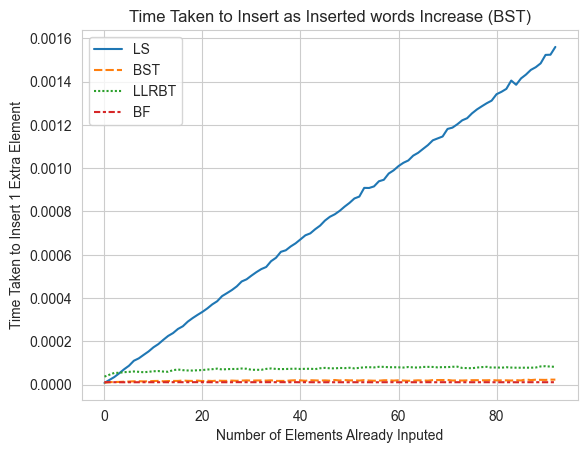

In [165]:
algo = 'BST'
upper_ylim = 0.001
insert_graph = sns.lineplot(data=pd_insert_time_averaged)
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

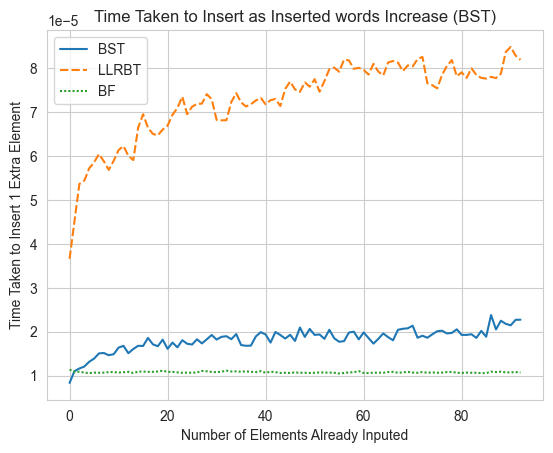

In [166]:
algo = 'BST'
upper_ylim = 0.001
insert_graph = sns.lineplot(data=pd_insert_time_averaged.drop('LS', axis=1))
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

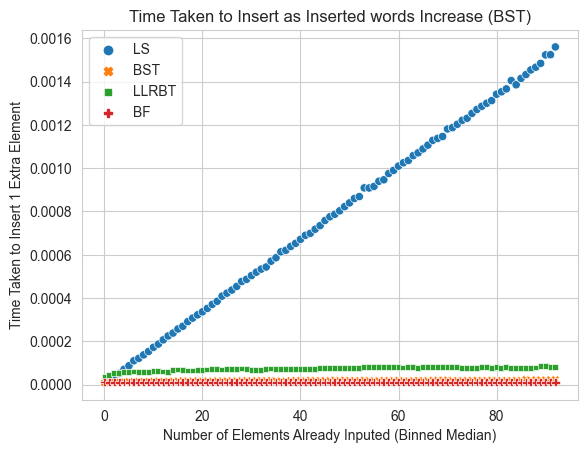

In [167]:
algo = 'BST'
upper_ylim = 0.00002
insert_graph = sns.scatterplot(data=pd_insert_time_averaged)
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed (Binned Median)', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

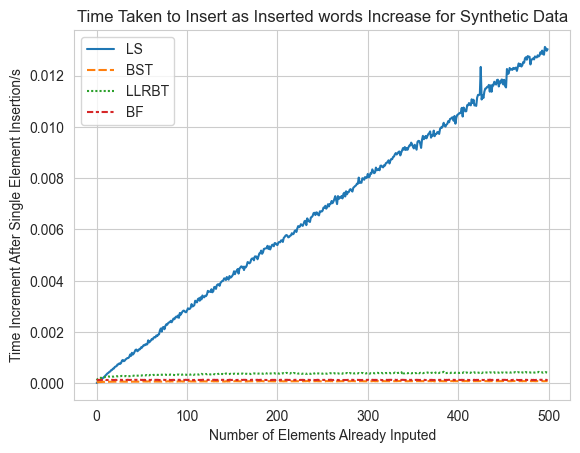

In [215]:
algo = 'BST'
upper_ylim = 0.0004
insert_graph = sns.lineplot(data=pd_insert_time_synthetic_averaged)
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase for Synthetic Data', xlabel='Number of Elements Already Inputed', ylabel='Time Increment After Single Element Insertion/s')
x = {i for i in range (0, 100)}

plt.show()

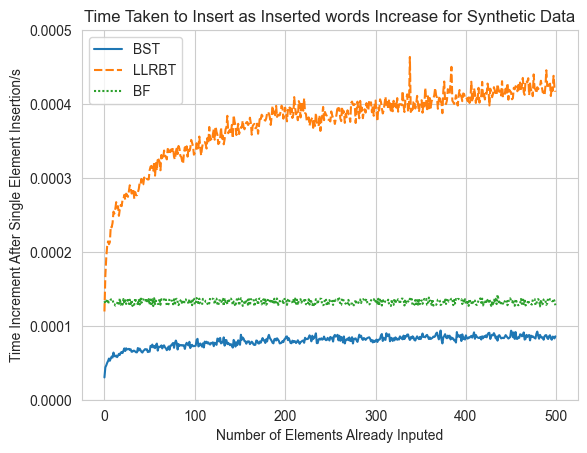

In [217]:
algo = 'BST'
upper_ylim = 0.0005
insert_graph = sns.lineplot(data=pd_insert_time_synthetic_averaged.drop('LS', axis=1))
insert_graph.set(ylim = [0, upper_ylim], title=f'Time Taken to Insert as Inserted words Increase for Synthetic Data', xlabel='Number of Elements Already Inputed', ylabel='Time Increment After Single Element Insertion/s')
x = {i for i in range (0, 100)}

plt.show()

In [168]:
pd_search_time

LS           BST         LLRBT            BF
0      1.318420e-07  1.797184e-07  3.317288e-07  8.425280e-06
185    3.204909e-06  7.937383e-07  1.115980e-06  8.880945e-07
370    6.182152e-06  8.804598e-07  1.267790e-06  8.569727e-07
555    9.337180e-06  9.449323e-07  1.564120e-06  8.695372e-07
740    1.292040e-05  9.668572e-07  1.436230e-06  8.891459e-07
...             ...           ...           ...           ...
17760  1.891544e-04  2.262732e-06  2.144670e-06  9.571185e-07
17945  1.920657e-04  1.533068e-06  2.357644e-06  9.319423e-07
18130  1.926145e-04  1.520550e-06  2.214101e-06  8.924933e-07
18315  1.937356e-04  2.077116e-06  2.200069e-06  9.994178e-07
18500  1.931082e-04  1.623248e-06  2.253058e-06  9.424098e-07

[101 rows x 4 columns]

In [218]:
pd_search_time_synthetic

LS           BST         LLRBT        BF
0      1.245548e-07  1.697140e-07  2.909101e-07  0.000002
500    1.010229e-05  7.781404e-07  1.121980e-06  0.000002
1000   1.584854e-05  8.462828e-07  1.227212e-06  0.000002
1500   2.343564e-05  8.913211e-07  1.302965e-06  0.000002
2000   3.082403e-05  9.306117e-07  1.403059e-06  0.000002
...             ...           ...           ...       ...
47500  6.102138e-04  1.151089e-06  2.380635e-06  0.000002
48000  6.155141e-04  1.163322e-06  2.391269e-06  0.000002
48500  6.195850e-04  1.151148e-06  2.345479e-06  0.000002
49000  6.262311e-04  1.159639e-06  2.365116e-06  0.000002
49500  6.316469e-04  1.154338e-06  2.312251e-06  0.000002

[100 rows x 4 columns]

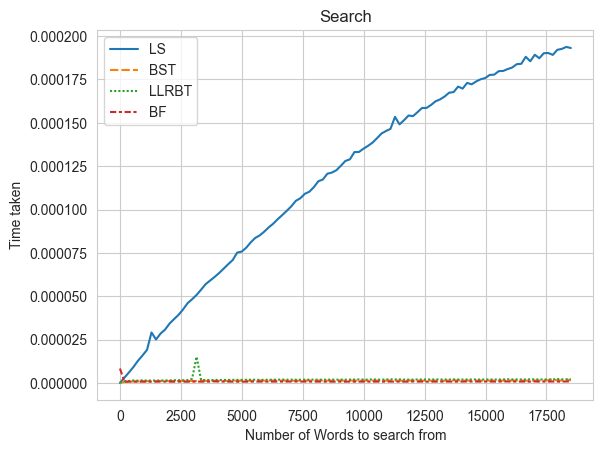

In [169]:
search_graph = sns.lineplot(data=pd_search_time)
search_graph.set(title='Search', xlabel='Number of Words to search from', ylabel='Time taken')
plt.show()

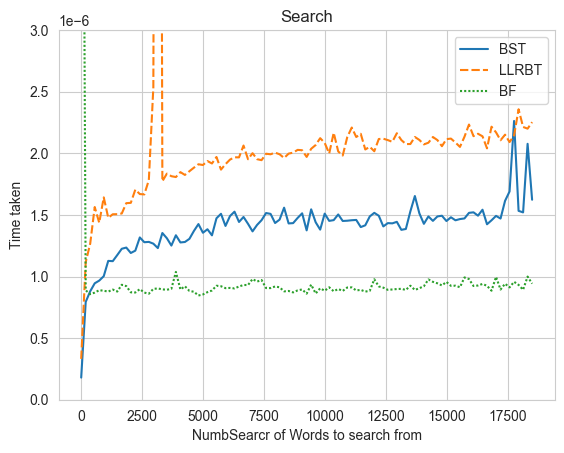

In [170]:
search_graph = sns.lineplot(data=pd_search_time.drop('LS', axis=1))
search_graph.set(ylim=(0, 0.000003),title='Search', xlabel='NumbSearcr of Words to search from', ylabel='Time taken')
plt.show()

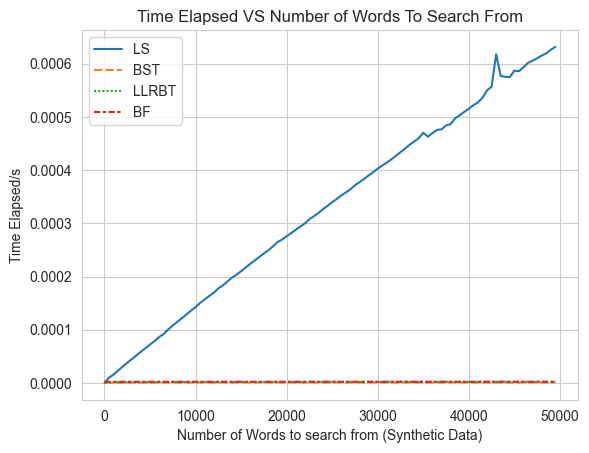

In [219]:
search_graph = sns.lineplot(data=pd_search_time_synthetic)
search_graph.set(title='Time Elapsed VS Number of Words To Search From', xlabel='Number of Words to search from (Synthetic Data)', ylabel='Time Elapsed/s')
plt.show()

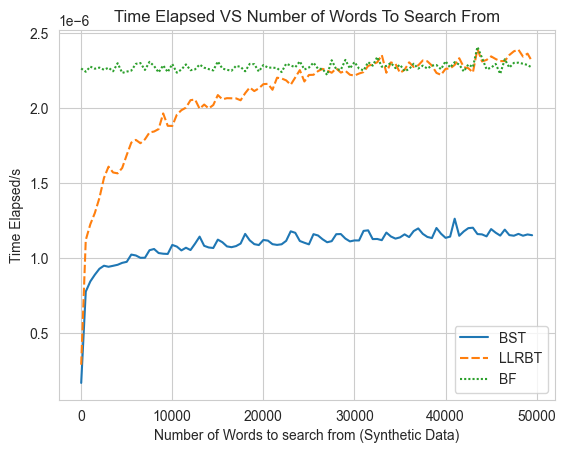

In [220]:
search_graph = sns.lineplot(data=pd_search_time_synthetic.drop('LS', axis=1))
search_graph.set(title='Time Elapsed VS Number of Words To Search From', xlabel='Number of Words to search from (Synthetic Data)', ylabel='Time Elapsed/s')
plt.show()

In [221]:
pd_insert_time_synthetic.to_csv('synthetic_insert3.csv')
pd_search_time_synthetic.to_csv('synthetic_search3.csv')
pd_insert_time_synthetic_averaged.to_csv('synthetic_insert_averaged3.csv')

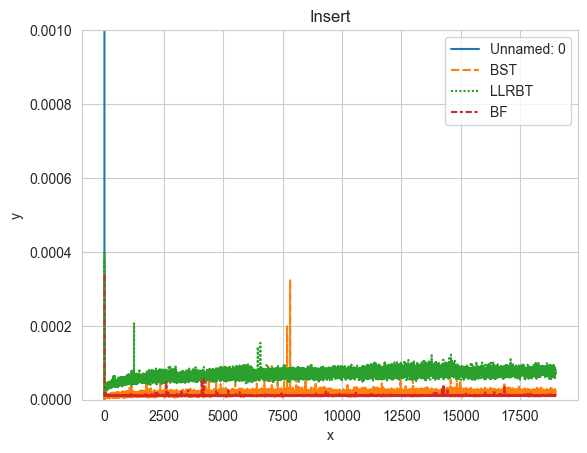

In [53]:
moby_dick_prev = pd.read_csv('moby_dick_insert.csv')
insert_graph_2 = sns.lineplot(data=moby_dick_prev.drop('LS', axis=1))
insert_graph_2.set(ylim=(0, 0.001),title='Insert', xlabel='x', ylabel='y')
plt.show()